In [92]:
import numpy as np
import pandas as pd
from statsmodels.api import datasets
from statsmodels.api import graphics
from statsmodels.api import tsa
from statsmodels.tsa.stattools import acf
%matplotlib inline

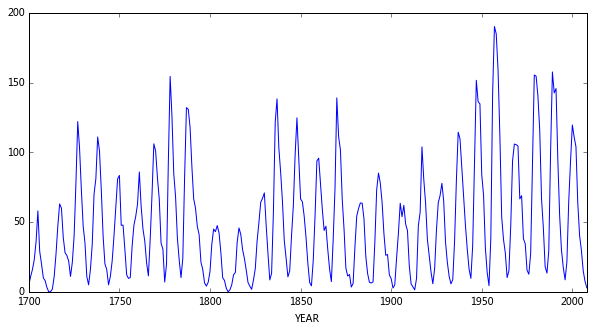

In [89]:
df = datasets.sunspots.load_pandas().data
df['YEAR'] = df['YEAR'].astype(int)
x = df.set_index('YEAR').iloc[:,0]
x.plot(figsize=(10, 5))

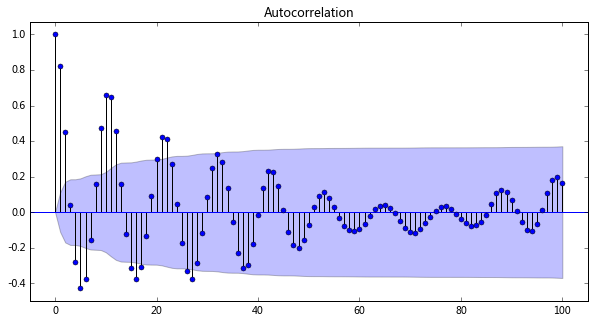

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = graphics.tsa.plot_acf(x.values, lags=100, ax=ax)

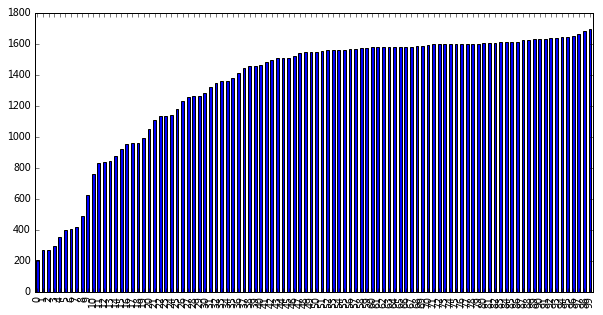

In [82]:
acfs, qstat, pvalue = acf(x, nlags=100, qstat=True)
result = pd.DataFrame({'acf': acfs[1:], 'qstat': qstat, 'pvalue': pvalue})
result['qstat'].plot(figsize=(10, 5), kind='bar')

In [104]:
arma2 = tsa.ARMA(x.values, (3,0)).fit()
arma2.params

array([ 49.74997563,   1.30081007,  -0.50809308,  -0.12964936])

In [112]:
arma_mod30 = sm.tsa.ARMA(x.values, (3,0)).fit()
sm.stats.durbin_watson(arma_mod30.resid)

1.9564812111117087

In [114]:
# 参考: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma.html